In [ ]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

%load_ext autoreload
%autoreload 2

In [ ]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.65,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
               'Iinit': 0.8,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 100,
              'delay': 500}

# Parameter Space

In [51]:
K_lst = np.arange(0.5, 10.5, 0.5)
th_lst = np.arange(0.6, 0.75, 0.01)
delay_lst = np.arange(400, 1000, 50)
tau = np.arange(60, 200, 10)

print(len(K_lst), len(th_lst), len(delay_lst), len(tau))

20 16 12 14


In [34]:
def create_search_space(srange, K_lst, th_lst, tau, delay_lst):
    search_space = []

    if srange == 'short':
        stimulus_range = [400, 450, 500, 550, 600, 650, 700]
    if srange == 'long':
        stimulus_range = [700, 750, 800, 850, 900, 950, 1000]
    if K_lst== True:
        K_lst = np.arange(0.5, 10.5, 0.5)
    if th_lst== True:
        th_lst = np.arange(0.6, 0.75, 0.01)
    if delay_lst== True:
        delay_lst = np.arange(400, 1000, 50)
    if tau== True:
        tau = np.arange(60, 200, 10)
    
    i = 0
    for K in K_lst:
        for th in th_lst:
            for t in tau:
                for delay in delay_lst:
                    i += 1
                    search_space.append((stimulus_range, K, th, t, delay))
    print(i)
    return search_space

In [35]:
srange = 'short'
K_lst = True
th_lst = [0.7]
tau = True
delay_lst = [700]

search_space = create_search_space(srange, K_lst, th_lst, tau, delay_lst)

280


In [8]:
short_stat = []
long_stat = []
with open('../results/SHORT_K5tau100th07del700-20220422-152328-output.pickle', 'rb') as short:
    with open('../results/LONG_K5tau100th07del700-20220422-164204-output.pickle', 'rb') as long:
        try:
            while True:
                short_stat.append(pickle.load(short))
                long_stat.append(pickle.load(long))
        except EOFError:
            pass

In [18]:
slope_short, slope_long, ind_short, ind_long, mse_short, mse_long= [], [], [], [], [], []

for i in range(len(short_stat)):
    slope_short.append(short_stat[i]['slope'])
    slope_long.append(long_stat[i]['slope'])
    ind_short.append(short_stat[i]['ind_point'])
    ind_long.append(long_stat[i]['ind_point'])
    mse_short.append(short_stat[i]['MSE'])
    mse_long.append(long_stat[i]['MSE'])

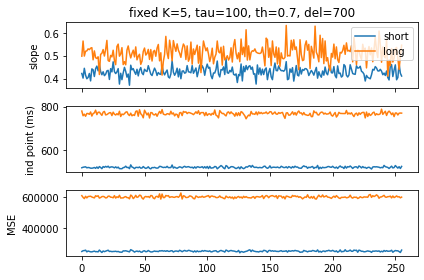

In [24]:
fig, axs = plt.subplots(3,1, sharex=True)

axs[0].plot(slope_short, label='short')
axs[0].plot(slope_long, label='long')
axs[0].set_ylabel('slope')
axs[0].legend()
axs[0].set_title('fixed K=5, tau=100, th=0.7, del=700')

axs[1].plot(ind_short)
axs[1].plot(ind_long)
axs[1].set_ylabel('ind point (ms)')

axs[2].plot(mse_short)
axs[2].plot(mse_long)
axs[2].set_ylabel('MSE')

plt.tight_layout()

In [17]:
short_ktau = []
long_ktau = []
with open('../results/SHORT_KTAU_th07del700-20220422-172830-output.pickle', 'rb') as short:
    with open('../results/LONG_KTAU_th07del700-20220422-174112-output.pickle', 'rb') as long:
        try:
            while True:
                short_ktau.append(pickle.load(short))
                long_ktau.append(pickle.load(long))
        except EOFError:
            pass

In [57]:
# p = K, th, tau, delay

def to_matrix(result_lst, p1, p2, result):
    matrix = np.zeros((p1,p2))
    for i in range(len(result_lst)):
        matrix.flat[i] = result_lst[i][result]
    return matrix

In [121]:
def create_parameter_plot(short, long, p1, p1_lst, p2, p2_lst, vmin, vmax):
    cmap = sns.color_palette('rocket', n_colors=20)
    
    fig, ax = plt.subplots(1,3, figsize= (15,4), sharex=True, sharey=True)
    cbar_ax = fig.add_axes([.91, .3, .03, .4])

    h1 = sns.heatmap(short, xticklabels=p2_lst, yticklabels=p1_lst, ax=ax[0], cmap = cmap, cbar=False,  vmin=vmin, vmax=vmax)
    h1.set_xlabel(p2)
    h1.set_ylabel(p1)
    h1.set_title('short')

    h2 = sns.heatmap(long, xticklabels=p2_lst, yticklabels=p1_lst, ax=ax[1], cmap = cmap, cbar=False,  vmin=vmin, vmax=vmax)
    h2.set_xlabel(p2)
    h2.set_title('long')

    h3 = sns.heatmap(short-long, xticklabels=p2_lst, yticklabels=p1_lst, ax=ax[2],  cmap = cmap, cbar_ax= cbar_ax, vmin=vmin, vmax=vmax)
    h3.set_xlabel(p2)
    h3.set_title('short-long')
    
    plt.show()

In [101]:
short_ktau_slope = to_matrix(short_ktau, len(K_lst), len(tau), 'slope')
long_ktau_slope = to_matrix(long_ktau, len(K_lst), len(tau), 'slope')

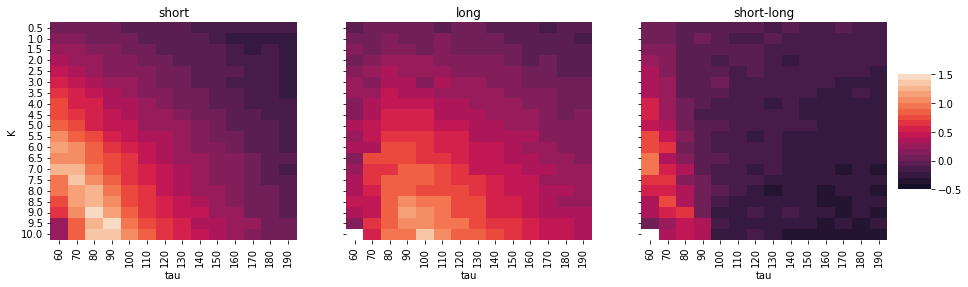

In [102]:
create_parameter_plot(short_ktau_slope, long_ktau_slope, 'K', K_lst, 'tau', tau, vmin=-0.5, vmax=1.5)

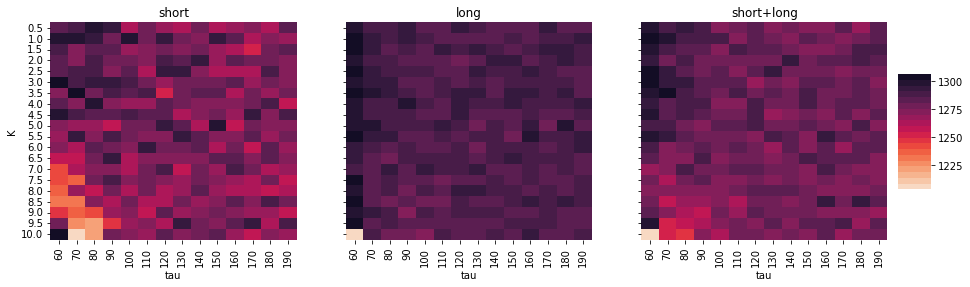

In [120]:
short_ktau_mse = to_matrix(short_ktau, len(K_lst), len(tau), 'MSE')
long_ktau_mse = to_matrix(long_ktau, len(K_lst), len(tau), 'MSE')
create_parameter_plot(np.sqrt(short_ktau_mse), np.sqrt(long_ktau_mse), 'K', K_lst, 'tau', tau, vmin=None, vmax=None)

In [ ]:
#why MSE when slope is none???

In [112]:
long_ktau[280-14]

{'range': 'long',
 'K': 10.0,
 'tau': 60,
 'threshold': 0.7,
 'delay': 700,
 'slope': nan,
 'ind_point': nan,
 'MSE': 470658.4210526316}